This notebook contains the project for Complex system simulation, Complex financial networks

In [2]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import os
import time
import datetime
import pickle
import argparse
import itertools
from typing import Dict, List, Any, Tuple
import doctest
import pandas as pd
import powerlaw
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import custom_functions_adj_saving_func as cm

# Financial contract network

Agent (nodes) want to enter into contracts with other agents (Links) to reduce their risk exposure. We will simulate what happens over time, studying when a total system collapse becomes more likely to occur as a function of the size of perturbation to the system.

1. There are total of $N$ Agents (nodes) and the i'th agent will have an exposure $e_i$ which initialized as a random number between 1 and -1.

2. Agents try to minimize their exposure by forming a link to another agent with opposite expsure, meaning finding another node with the opposite sign of $e_i$, namely $e_j$ such that the sum of their exposures $\Sigma e$ is as close to 0 as possible. A link is formed if $\Sigma e$ is minimal, if $\Sigma e$ is above a threshold, $T_e$, such that $\Sigma e$ > $T_e$ no link will be formed. 

We have to options for the link weights- Option B: The link weight is equal to the previous exposure of the node, and links are always biirectional but carry different weights. Thus the link weights become: $W$ is a weight function, so that $W(L_{ij}) = e_{ij}$ and $W(L_{ji}) = e_{ji}$ 

3. Each timestep the exposure of an agent is a brownian motion. Agents have exposure to the price of stock. We assume all agents have exposure to the same asset for simplicity. 

Agents have total volatility $V$, which is $e$ times the prive movement $S$, $e * S = V$. If V $<$ or $>$ threshold value $T_v$, an agent becomes bankrupt and also dies (meaning the node gets removed). This causes all links $L_{ij}$ to be removed and the values of the weights $W_{L_{ij}}$ to be added $e_{j}$ which is the exposure of $N_{j}$, which then increases the chances of $e_{j} > T_e$ and $N_{j}$ dying as a result, causing the effect to propagate.

- Hypothesis is that an increased average move away from the mean causes a higher probability of default when the number of links is higher



Limitations: 
- Bank only link at most twice, which is unrealistic as banks have more transactions
- There is only 1 asset

Agents are willing to link if their summed exposure is small, because then it brings their new exposure closer to 0. The new exposure $E_{i_{t+1}}$ is a random draw between -1 and 1.

If a node cannot find any other node to link with (Due to threshold or or because there are simply no nodes to link with) 

then becomes $E_{i_{t}}$ + the column and row sums of the adjacency matrix. 

# Testing the Linking function 

# Extending the framework

We need logic to account for when a node dies and what then happens to the exposure of the other nodes, the function below does this:

# First run

In [3]:
# Parameters for the simulation
N_agents = 100
time_steps = 200# Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'exposure'



# running time 1 pass with these params: 900 seconds

# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode, link_formation_mode = link_formation_mode, create_new_node_mode = create_new_node_mode, bankruptcy_mode = bankruptcy_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

# Visual tests of network behavior

In [42]:
N_agents = 500
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'


# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode, link_formation_mode = link_formation_mode, create_new_node_mode = create_new_node_mode, bankruptcy_mode = bankruptcy_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

In [43]:
# params

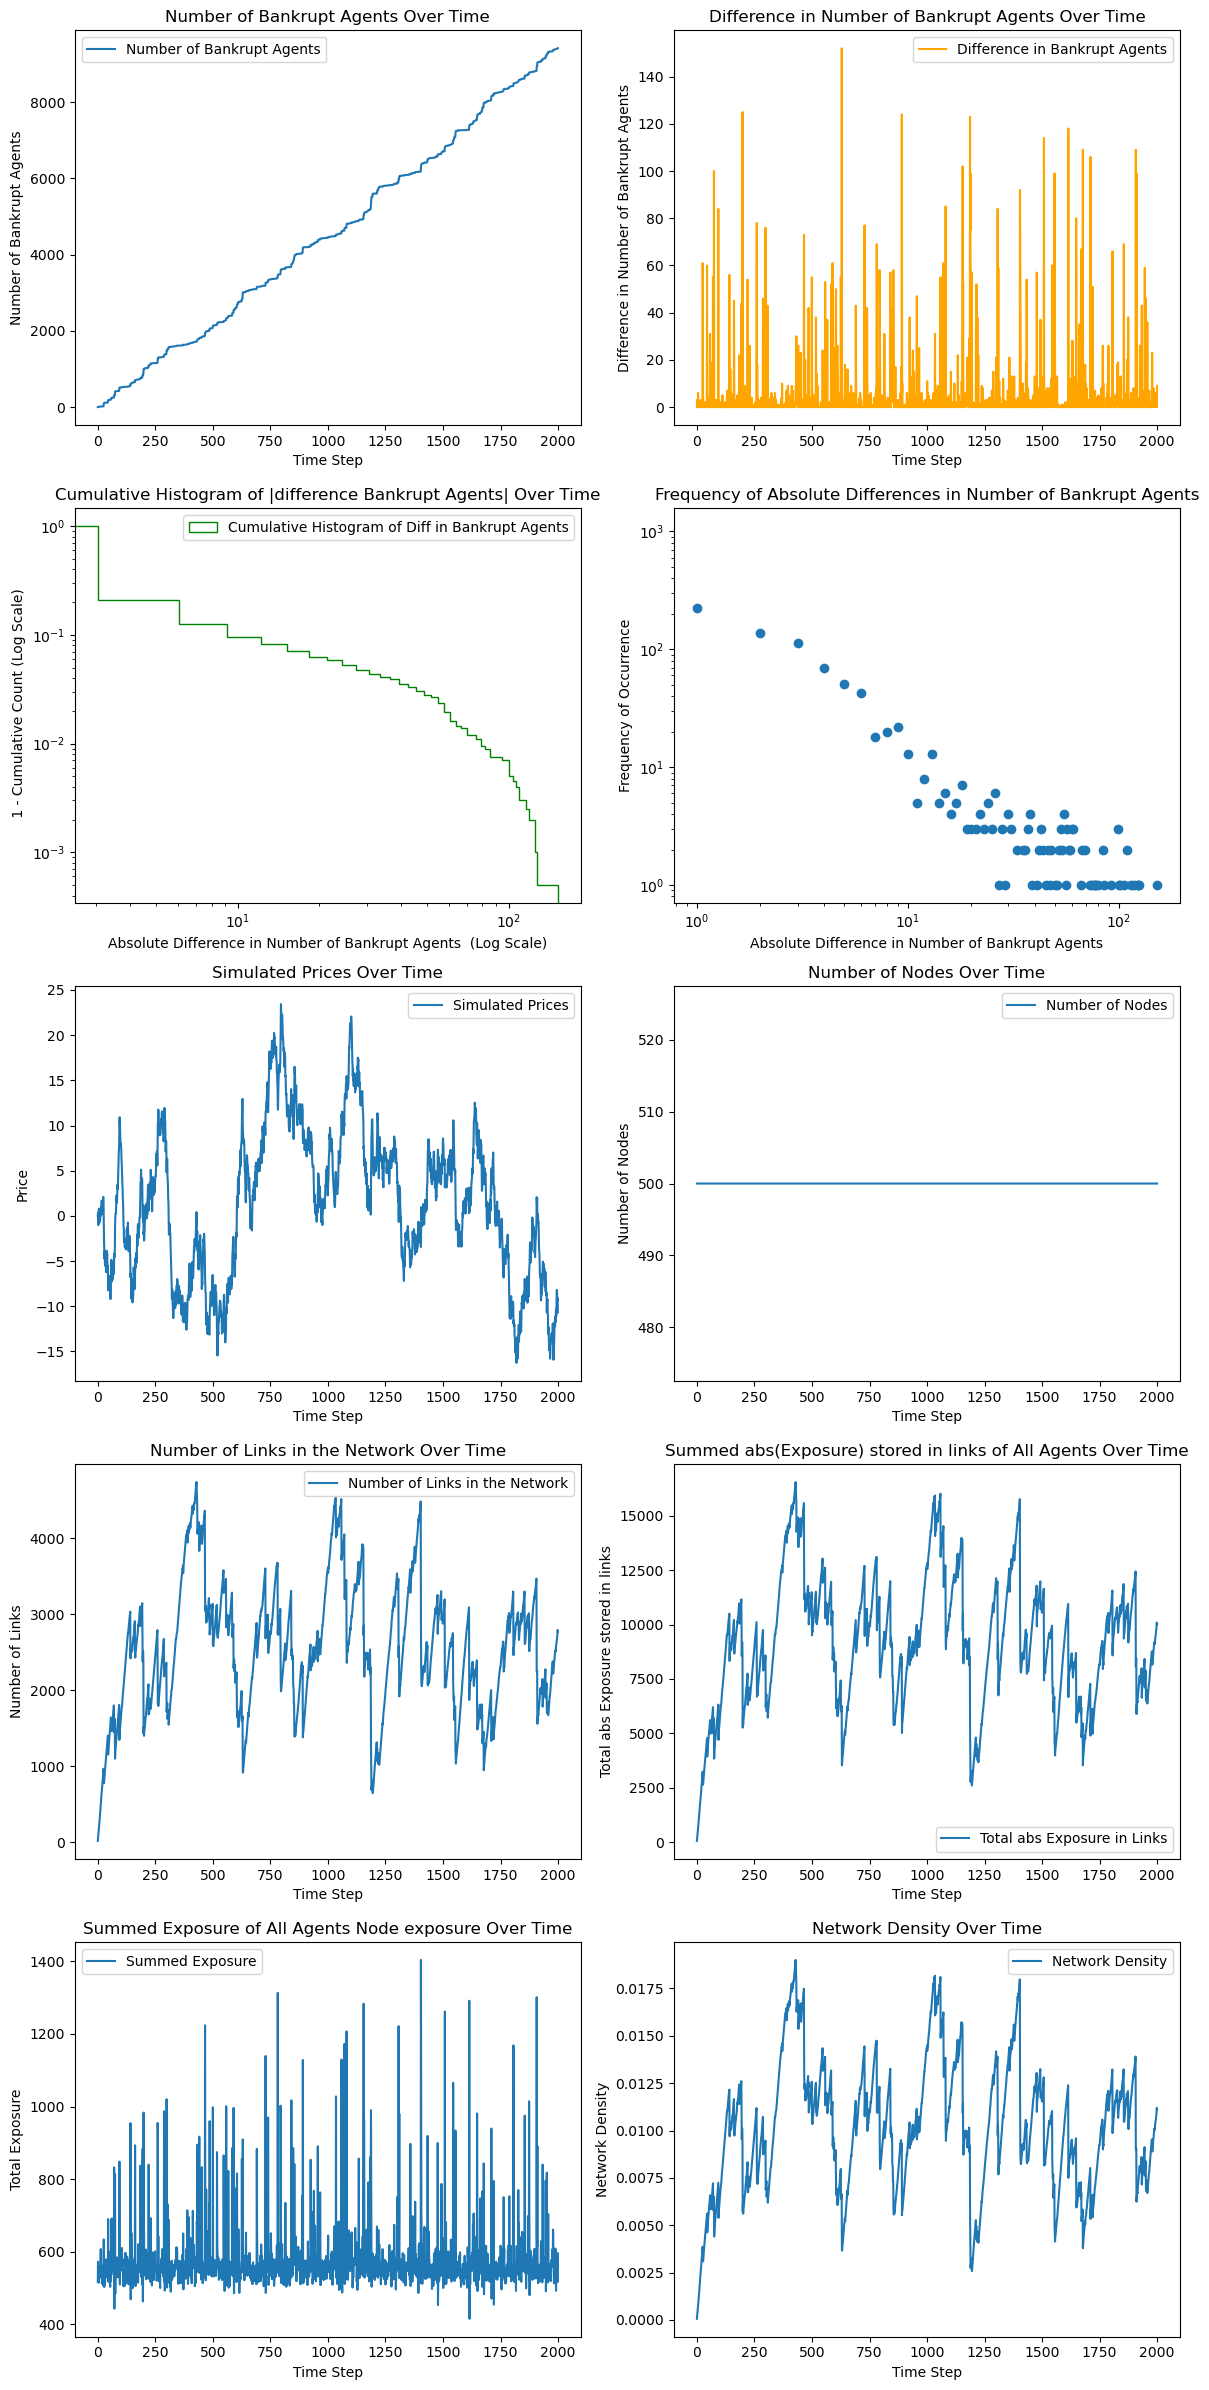

In [44]:
# num_bankrupt_agents_over_time, node_population_over_time, links_over_time, total_abs_exposure_in_edge_weights, exposures_over_time, simulated_prices
cm.plot_financial_network_results(num_bankrupt_agents_over_time= num_bankrupt_agents_over_time, node_population_over_time=node_population_over_time, links_over_time=links_over_time, total_abs_exposure_in_edge_weights=total_abs_exposure_in_edge_weights, exposures_over_time=exposures_over_time, simulated_prices=simulated_prices)

# Hypothesis tests


**Does the bankruptcy per step follow powerlaw distribution?**

Null Hypothesis (H0): The data follows an exponential distribution as well as or better than a power-law distribution.

Alternative Hypothesis (H1): The data follows a power-law distribution better than an exponential distribution.

In [46]:
diff_bankrupt_agents = np.diff(num_bankrupt_agents_over_time)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


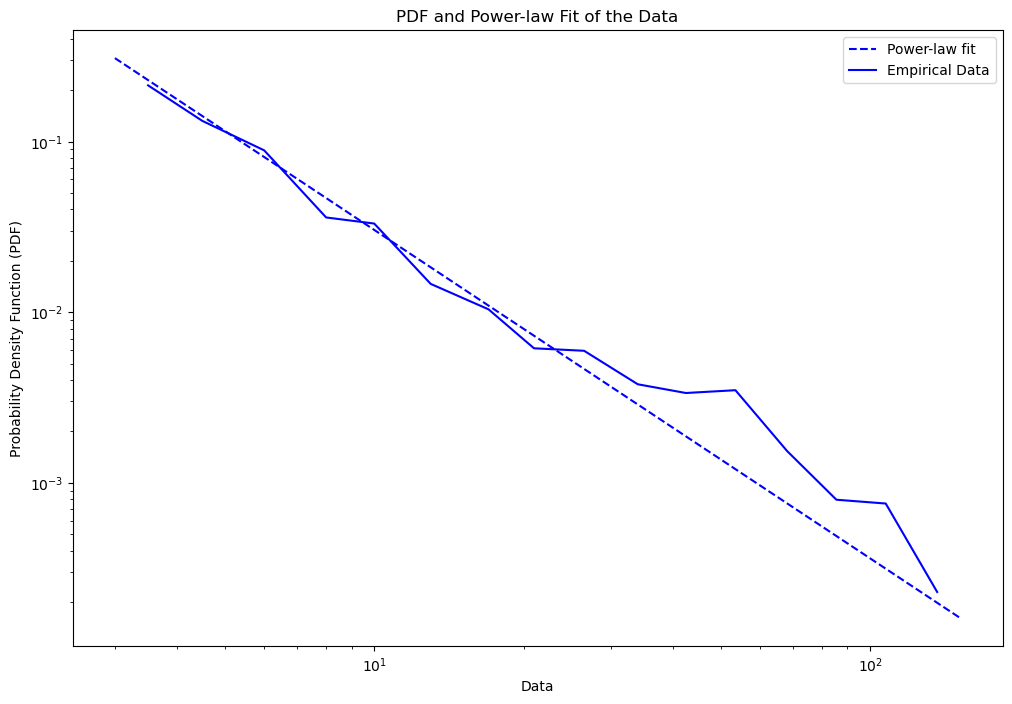

Power-law exponent (alpha): 1.9253781493820439
Loglikelihood ratio between power law and exponential distribution: 9.252580812215953
Statistical significance of the fit (p-value): 2.1913641187320665e-20
The data follows a power-law distribution better than an exponential distribution.


(1.9253781493820439, 9.252580812215953, 2.1913641187320665e-20)

In [47]:
cm.fit_power_law(np.abs(diff_bankrupt_agents))

# Multiple run simulator

In [48]:

# data_of_multirun = multi_parameter_financial_network_simulator(runs=10, N_agents_list=[200,500,1000,2000], num_steps_list=[2000], delta_t_list=[0.01], sigma_exposure_node_list = [0.2,0.5,1],  sigma_intrestrate_list = [16,32,50], threshold_v_list= [1,4,10], linking_threshold_list = [0.5,0.2,0.1,0.01])


In [49]:
N_agents = [100, 200, 300, 400, 500]
time_steps = 200# Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'exposure'


# data_of_multirun = cm.multi_parameter_financial_network_simulator(runs=5, N_agents_list=[500,250,100], num_steps_list=[3000], delta_t_list=[0.01], sigma_exposure_node_list = [2],  sigma_intrestrate_list = [20,40,80], threshold_v_list= [2], linking_threshold_list = [2], swap_exposure_threshold_list = [2,10,50], time_to_maturity_list =[1], link_formation_mode = ['divide exposure singly'], create_new_node_mode = True, link_formation_mode = link_formation_mode ,bankruptcy_mode = 'exposure' )
 
data_of_multirun = cm.multi_parameter_financial_network_simulator(runs=2, N_agents_list=[100], num_steps_list=[200], delta_t_list=[1], sigma_exposure_node_list = [1],  sigma_intrestrate_list = [1], threshold_v_list= [2], linking_threshold_list = [2], swap_exposure_threshold_list = [2], time_to_maturity_list =[1], create_new_node_mode = True, link_formation_mode = link_formation_mode, bankruptcy_mode = 'exposure', link_threshold_mode_list = ['hard cutoff'] )
 

2024-01-31 20:16:58 - Progress: 2/2 (100.00%) - Estimated Time Remaining: 0:00:00
2024-01-31 20:16:59 - Progress: 3/2 (150.00%) - Estimated Time Remaining: -1 day, 23:59:59
Saved results to 100_200_1_1_1_2_2_2_1_hard cutoff_divide exposure singly_exposure_20240131201659.csv
Saved all results to simulation_results_divide exposure singly_exposure_20240131201659.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


# Varying N

In [50]:
# Varying N_agents, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 15
N_agents = [100, 200, 300, 400, 500]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=N_agents, 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-01-31 20:17:09 - Progress: 2/75 (2.67%) - Estimated Time Remaining: 0:06:00
2024-01-31 20:17:19 - Progress: 3/75 (4.00%) - Estimated Time Remaining: 0:07:53
2024-01-31 20:17:29 - Progress: 4/75 (5.33%) - Estimated Time Remaining: 0:08:52
2024-01-31 20:17:39 - Progress: 5/75 (6.67%) - Estimated Time Remaining: 0:09:17
2024-01-31 20:17:50 - Progress: 6/75 (8.00%) - Estimated Time Remaining: 0:09:40
2024-01-31 20:18:00 - Progress: 7/75 (9.33%) - Estimated Time Remaining: 0:09:48
2024-01-31 20:18:11 - Progress: 8/75 (10.67%) - Estimated Time Remaining: 0:09:58
2024-01-31 20:18:22 - Progress: 9/75 (12.00%) - Estimated Time Remaining: 0:10:06
2024-01-31 20:18:34 - Progress: 10/75 (13.33%) - Estimated Time Remaining: 0:10:11
2024-01-31 20:18:45 - Progress: 11/75 (14.67%) - Estimated Time Remaining: 0:10:13


KeyboardInterrupt: 

Running time ~ 6 min * 5 parameters * 15 runs = 450 mins


In [ ]:
# Varying N_agents, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 15
N_agents = [100, 200, 300, 400, 500]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=N_agents, 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

KeyboardInterrupt: 

Running time ~ 15 min * 5 parameters * 15 runs = 1125 min = 18.75

# Varying Sigma (interst rate and node exposure)

In [ ]:
# Varying sigma_exposure_node, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 15
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [0.5, 1, 2, 3, 4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

KeyboardInterrupt: 

Runtime varying sigma ~ 5 min

5 * 15 = 75

75 * 5 = 375 min ~ 6.5 hours

In [ ]:
# Varying sigma_exposure_node, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 15
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = [0.5, 1, 2, 3, 4]
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

Runtime varying sigma ~ 6 seconds for 1 run

5 * 15 = 75 

75 * 6 = 7.5 min

In [ ]:
# Varying sigma_exposure_node, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 15
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [0.5, 1, 2, 3, 4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

NameError: name 'cm' is not defined

Runtime varying sigma ~ 5 min

5 * 15 = 75

75 * 5 = 375 min ~ 6.5 hours

Total running time Varying Sigma ~ 13.5 hours

# Varying threshold_v

In [ ]:
# Varying Threshold_v, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 1
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = [5, 7.5, 10, 15, 20]  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=threshold_v, 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-01-31 19:16:37 - Progress: 2/5 (40.00%) - Estimated Time Remaining: 0:02:12
Saved results to 300_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131191637.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


2024-01-31 19:18:56 - Progress: 3/5 (60.00%) - Estimated Time Remaining: 0:02:32
Saved results to 300_2000_1_1_1_7.5_1_3_400_hard cutoff_random link logic_exposure_20240131191856.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


2024-01-31 19:21:18 - Progress: 4/5 (80.00%) - Estimated Time Remaining: 0:01:32
Saved results to 300_2000_1_1_1_10_1_3_400_hard cutoff_random link logic_exposure_20240131192118.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


2024-01-31 19:23:32 - Progress: 5/5 (100.00%) - Estimated Time Remaining: 0:00:00
Saved results to 300_2000_1_1_1_15_1_3_400_hard cutoff_random link logic_exposure_20240131192332.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


2024-01-31 19:25:18 - Progress: 6/5 (120.00%) - Estimated Time Remaining: -1 day, 23:58:19
Saved results to 300_2000_1_1_1_20_1_3_400_hard cutoff_random link logic_exposure_20240131192518.csv
Saved all results to simulation_results_random link logic_exposure_20240131192518.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Parameters:


Running time ~ 3.7 min * 4 parameters * 15 runs = 222 mins = 3.7 hours

In [ ]:
# Varying Threshold_v, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 15
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = [5, 10, 15]  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=threshold_v, 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\nitai\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\nitai\AppData\Local\Temp\ipykernel_33012\2147477168.py", line 18, in <module>
    data_of_multirun = cm.multi_parameter_financial_network_simulator(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py", line 580, in multi_parameter_financial_network_simulator
    result = financial_network_simulator(N_agents, num_steps, delta_t, sigma_exposure_node, sigma_intrestrate, threshold_v, linking_threshold, swap_exposure_threshold, print_timestep=False, time_to_maturity=time_to_maturity, link_threshold_mode=link_threshold_mode, link_formation_mode = link_formation_mode, bankruptcy_mode = bankruptcy_mode, create_new_node_mode = create_new_node_mode)

Runningtime ~ 10 min * 4 parameters * 15 runs = 750 min = 10

Runnting time varying threshold_v = 13.7 hours

If time, vary time to maturity

In [ ]:
# Varying time to maturity, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

KeyboardInterrupt: 

In [ ]:
# Varying time to maturity, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\nitai\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\nitai\AppData\Local\Temp\ipykernel_33012\3918048037.py", line 18, in <module>
    data_of_multirun = cm.multi_parameter_financial_network_simulator(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py", line 580, in multi_parameter_financial_network_simulator
    result = financial_network_simulator(N_agents, num_steps, delta_t, sigma_exposure_node, sigma_intrestrate, threshold_v, linking_threshold, swap_exposure_threshold, print_timestep=False, time_to_maturity=time_to_maturity, link_threshold_mode=link_threshold_mode, link_formation_mode = link_formation_mode, bankruptcy_mode = bankruptcy_mode, create_new_node_mode = create_new_node_mode)

Combination run Nitai


In [ ]:
# Combi run, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = [100, 200, 300]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [1,2,4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=N_agents, 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-01-31 00:02:40 - Progress: 2/135 (1.48%) - Estimated Time Remaining: 0:21:58
2024-01-31 00:02:59 - Progress: 3/135 (2.22%) - Estimated Time Remaining: 0:28:57
2024-01-31 00:03:19 - Progress: 4/135 (2.96%) - Estimated Time Remaining: 0:32:15
2024-01-31 00:03:38 - Progress: 5/135 (3.70%) - Estimated Time Remaining: 0:34:04
2024-01-31 00:03:58 - Progress: 6/135 (4.44%) - Estimated Time Remaining: 0:35:13
Saved results to 100_2000_1_1_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131000358.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:04:18 - Progress: 7/135 (5.19%) - Estimated Time Remaining: 0:36:00
2024-01-31 00:04:37 - Progress: 8/135 (5.93%) - Estimated Time Remaining: 0:36:27
2024-01-31 00:04:57 - Progress: 9/135 (6.67%) - Estimated Time Remaining: 0:36:43
2024-01-31 00:05:17 - Progress: 10/135 (7.41%) - Estimated Time Remaining: 0:36:54
2024-01-31 00:05:37 - Progress: 11/135 (8.15%) - Estimated Time Remaining: 0:37:00
Saved results to 100_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131000537.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:05:57 - Progress: 12/135 (8.89%) - Estimated Time Remaining: 0:37:03
2024-01-31 00:06:16 - Progress: 13/135 (9.63%) - Estimated Time Remaining: 0:37:00
2024-01-31 00:06:36 - Progress: 14/135 (10.37%) - Estimated Time Remaining: 0:36:57
2024-01-31 00:06:56 - Progress: 15/135 (11.11%) - Estimated Time Remaining: 0:36:50
2024-01-31 00:07:16 - Progress: 16/135 (11.85%) - Estimated Time Remaining: 0:36:41
Saved results to 100_2000_1_1_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131000716.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:07:35 - Progress: 17/135 (12.59%) - Estimated Time Remaining: 0:36:28
2024-01-31 00:07:54 - Progress: 18/135 (13.33%) - Estimated Time Remaining: 0:36:13
2024-01-31 00:08:13 - Progress: 19/135 (14.07%) - Estimated Time Remaining: 0:35:58
2024-01-31 00:08:32 - Progress: 20/135 (14.81%) - Estimated Time Remaining: 0:35:41
2024-01-31 00:08:51 - Progress: 21/135 (15.56%) - Estimated Time Remaining: 0:35:25
Saved results to 100_2000_1_2_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131000851.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:09:11 - Progress: 22/135 (16.30%) - Estimated Time Remaining: 0:35:10
2024-01-31 00:09:30 - Progress: 23/135 (17.04%) - Estimated Time Remaining: 0:34:55
2024-01-31 00:09:49 - Progress: 24/135 (17.78%) - Estimated Time Remaining: 0:34:39
2024-01-31 00:10:08 - Progress: 25/135 (18.52%) - Estimated Time Remaining: 0:34:22
2024-01-31 00:10:28 - Progress: 26/135 (19.26%) - Estimated Time Remaining: 0:34:05
Saved results to 100_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131001028.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:10:47 - Progress: 27/135 (20.00%) - Estimated Time Remaining: 0:33:49
2024-01-31 00:11:07 - Progress: 28/135 (20.74%) - Estimated Time Remaining: 0:33:33
2024-01-31 00:11:26 - Progress: 29/135 (21.48%) - Estimated Time Remaining: 0:33:16
2024-01-31 00:11:45 - Progress: 30/135 (22.22%) - Estimated Time Remaining: 0:32:59
2024-01-31 00:12:05 - Progress: 31/135 (22.96%) - Estimated Time Remaining: 0:32:42
Saved results to 100_2000_1_2_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131001205.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:12:23 - Progress: 32/135 (23.70%) - Estimated Time Remaining: 0:32:22
2024-01-31 00:12:42 - Progress: 33/135 (24.44%) - Estimated Time Remaining: 0:32:01
2024-01-31 00:13:00 - Progress: 34/135 (25.19%) - Estimated Time Remaining: 0:31:41
2024-01-31 00:13:18 - Progress: 35/135 (25.93%) - Estimated Time Remaining: 0:31:21
2024-01-31 00:13:36 - Progress: 36/135 (26.67%) - Estimated Time Remaining: 0:31:00
Saved results to 100_2000_1_4_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131001336.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:13:55 - Progress: 37/135 (27.41%) - Estimated Time Remaining: 0:30:40
2024-01-31 00:14:13 - Progress: 38/135 (28.15%) - Estimated Time Remaining: 0:30:20
2024-01-31 00:14:31 - Progress: 39/135 (28.89%) - Estimated Time Remaining: 0:30:00
2024-01-31 00:14:49 - Progress: 40/135 (29.63%) - Estimated Time Remaining: 0:29:40
2024-01-31 00:15:08 - Progress: 41/135 (30.37%) - Estimated Time Remaining: 0:29:20
Saved results to 100_2000_1_4_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131001508.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:15:26 - Progress: 42/135 (31.11%) - Estimated Time Remaining: 0:29:01
2024-01-31 00:15:44 - Progress: 43/135 (31.85%) - Estimated Time Remaining: 0:28:41
2024-01-31 00:16:03 - Progress: 44/135 (32.59%) - Estimated Time Remaining: 0:28:22
2024-01-31 00:16:21 - Progress: 45/135 (33.33%) - Estimated Time Remaining: 0:28:02
2024-01-31 00:16:40 - Progress: 46/135 (34.07%) - Estimated Time Remaining: 0:27:43
Saved results to 100_2000_1_4_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131001640.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:17:59 - Progress: 47/135 (34.81%) - Estimated Time Remaining: 0:29:18
2024-01-31 00:19:18 - Progress: 48/135 (35.56%) - Estimated Time Remaining: 0:30:46
2024-01-31 00:20:36 - Progress: 49/135 (36.30%) - Estimated Time Remaining: 0:32:04
2024-01-31 00:22:06 - Progress: 50/135 (37.04%) - Estimated Time Remaining: 0:33:36
2024-01-31 00:23:38 - Progress: 51/135 (37.78%) - Estimated Time Remaining: 0:35:05
Saved results to 200_2000_1_1_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131002338.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:25:12 - Progress: 52/135 (38.52%) - Estimated Time Remaining: 0:36:29
2024-01-31 00:26:45 - Progress: 53/135 (39.26%) - Estimated Time Remaining: 0:37:47
2024-01-31 00:28:19 - Progress: 54/135 (40.00%) - Estimated Time Remaining: 0:38:58
2024-01-31 00:29:50 - Progress: 55/135 (40.74%) - Estimated Time Remaining: 0:40:00
2024-01-31 00:31:11 - Progress: 56/135 (41.48%) - Estimated Time Remaining: 0:40:42
Saved results to 200_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131003111.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:32:30 - Progress: 57/135 (42.22%) - Estimated Time Remaining: 0:41:17
2024-01-31 00:33:50 - Progress: 58/135 (42.96%) - Estimated Time Remaining: 0:41:50
2024-01-31 00:35:09 - Progress: 59/135 (43.70%) - Estimated Time Remaining: 0:42:17
2024-01-31 00:36:25 - Progress: 60/135 (44.44%) - Estimated Time Remaining: 0:42:37
2024-01-31 00:37:40 - Progress: 61/135 (45.19%) - Estimated Time Remaining: 0:42:52
Saved results to 200_2000_1_1_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131003740.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:38:53 - Progress: 62/135 (45.93%) - Estimated Time Remaining: 0:43:02
2024-01-31 00:40:06 - Progress: 63/135 (46.67%) - Estimated Time Remaining: 0:43:10
2024-01-31 00:41:18 - Progress: 64/135 (47.41%) - Estimated Time Remaining: 0:43:14
2024-01-31 00:42:31 - Progress: 65/135 (48.15%) - Estimated Time Remaining: 0:43:16
2024-01-31 00:43:43 - Progress: 66/135 (48.89%) - Estimated Time Remaining: 0:43:16
Saved results to 200_2000_1_2_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131004343.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:44:57 - Progress: 67/135 (49.63%) - Estimated Time Remaining: 0:43:15
2024-01-31 00:46:14 - Progress: 68/135 (50.37%) - Estimated Time Remaining: 0:43:15
2024-01-31 00:47:36 - Progress: 69/135 (51.11%) - Estimated Time Remaining: 0:43:18
2024-01-31 00:48:51 - Progress: 70/135 (51.85%) - Estimated Time Remaining: 0:43:11
2024-01-31 00:50:04 - Progress: 71/135 (52.59%) - Estimated Time Remaining: 0:43:02
Saved results to 200_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131005004.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:51:18 - Progress: 72/135 (53.33%) - Estimated Time Remaining: 0:42:50
2024-01-31 00:52:31 - Progress: 73/135 (54.07%) - Estimated Time Remaining: 0:42:37
2024-01-31 00:53:44 - Progress: 74/135 (54.81%) - Estimated Time Remaining: 0:42:22
2024-01-31 00:54:57 - Progress: 75/135 (55.56%) - Estimated Time Remaining: 0:42:05
2024-01-31 00:56:10 - Progress: 76/135 (56.30%) - Estimated Time Remaining: 0:41:47
Saved results to 200_2000_1_2_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131005610.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 00:57:19 - Progress: 77/135 (57.04%) - Estimated Time Remaining: 0:41:24
2024-01-31 00:58:27 - Progress: 78/135 (57.78%) - Estimated Time Remaining: 0:41:00
2024-01-31 00:59:36 - Progress: 79/135 (58.52%) - Estimated Time Remaining: 0:40:36
2024-01-31 01:00:45 - Progress: 80/135 (59.26%) - Estimated Time Remaining: 0:40:10
2024-01-31 01:01:54 - Progress: 81/135 (60.00%) - Estimated Time Remaining: 0:39:42
Saved results to 200_2000_1_4_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131010154.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:03:03 - Progress: 82/135 (60.74%) - Estimated Time Remaining: 0:39:14
2024-01-31 01:04:11 - Progress: 83/135 (61.48%) - Estimated Time Remaining: 0:38:45
2024-01-31 01:05:20 - Progress: 84/135 (62.22%) - Estimated Time Remaining: 0:38:15
2024-01-31 01:06:30 - Progress: 85/135 (62.96%) - Estimated Time Remaining: 0:37:44
2024-01-31 01:07:39 - Progress: 86/135 (63.70%) - Estimated Time Remaining: 0:37:12
Saved results to 200_2000_1_4_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131010739.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:08:48 - Progress: 87/135 (64.44%) - Estimated Time Remaining: 0:36:40
2024-01-31 01:09:57 - Progress: 88/135 (65.19%) - Estimated Time Remaining: 0:36:06
2024-01-31 01:11:05 - Progress: 89/135 (65.93%) - Estimated Time Remaining: 0:35:32
2024-01-31 01:12:14 - Progress: 90/135 (66.67%) - Estimated Time Remaining: 0:34:57
2024-01-31 01:13:23 - Progress: 91/135 (67.41%) - Estimated Time Remaining: 0:34:21
Saved results to 200_2000_1_4_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131011323.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:16:11 - Progress: 92/135 (68.15%) - Estimated Time Remaining: 0:34:31
2024-01-31 01:18:59 - Progress: 93/135 (68.89%) - Estimated Time Remaining: 0:34:36
2024-01-31 01:21:46 - Progress: 94/135 (69.63%) - Estimated Time Remaining: 0:34:39
2024-01-31 01:24:34 - Progress: 95/135 (70.37%) - Estimated Time Remaining: 0:34:37
2024-01-31 01:27:22 - Progress: 96/135 (71.11%) - Estimated Time Remaining: 0:34:32
Saved results to 300_2000_1_1_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131012722.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:30:10 - Progress: 97/135 (71.85%) - Estimated Time Remaining: 0:34:24
2024-01-31 01:32:57 - Progress: 98/135 (72.59%) - Estimated Time Remaining: 0:34:12
2024-01-31 01:35:45 - Progress: 99/135 (73.33%) - Estimated Time Remaining: 0:33:58
2024-01-31 01:38:32 - Progress: 100/135 (74.07%) - Estimated Time Remaining: 0:33:40
2024-01-31 01:41:20 - Progress: 101/135 (74.81%) - Estimated Time Remaining: 0:33:19
Saved results to 300_2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131014120.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:44:09 - Progress: 102/135 (75.56%) - Estimated Time Remaining: 0:32:56
2024-01-31 01:46:57 - Progress: 103/135 (76.30%) - Estimated Time Remaining: 0:32:30
2024-01-31 01:49:45 - Progress: 104/135 (77.04%) - Estimated Time Remaining: 0:32:01
2024-01-31 01:52:33 - Progress: 105/135 (77.78%) - Estimated Time Remaining: 0:31:29
2024-01-31 01:55:22 - Progress: 106/135 (78.52%) - Estimated Time Remaining: 0:30:55
Saved results to 300_2000_1_1_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131015522.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 01:58:03 - Progress: 107/135 (79.26%) - Estimated Time Remaining: 0:30:17
2024-01-31 02:00:44 - Progress: 108/135 (80.00%) - Estimated Time Remaining: 0:29:36
2024-01-31 02:03:25 - Progress: 109/135 (80.74%) - Estimated Time Remaining: 0:28:53
2024-01-31 02:06:05 - Progress: 110/135 (81.48%) - Estimated Time Remaining: 0:28:07
2024-01-31 02:08:45 - Progress: 111/135 (82.22%) - Estimated Time Remaining: 0:27:20
Saved results to 300_2000_1_2_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131020845.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 02:11:27 - Progress: 112/135 (82.96%) - Estimated Time Remaining: 0:26:30
2024-01-31 02:14:07 - Progress: 113/135 (83.70%) - Estimated Time Remaining: 0:25:39
2024-01-31 02:16:48 - Progress: 114/135 (84.44%) - Estimated Time Remaining: 0:24:46
2024-01-31 02:19:29 - Progress: 115/135 (85.19%) - Estimated Time Remaining: 0:23:51
2024-01-31 02:22:11 - Progress: 116/135 (85.93%) - Estimated Time Remaining: 0:22:54
Saved results to 300_2000_1_2_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131022211.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 02:24:52 - Progress: 117/135 (86.67%) - Estimated Time Remaining: 0:21:55
2024-01-31 02:27:32 - Progress: 118/135 (87.41%) - Estimated Time Remaining: 0:20:55
2024-01-31 02:30:15 - Progress: 119/135 (88.15%) - Estimated Time Remaining: 0:19:53
2024-01-31 02:32:57 - Progress: 120/135 (88.89%) - Estimated Time Remaining: 0:18:49
2024-01-31 02:35:39 - Progress: 121/135 (89.63%) - Estimated Time Remaining: 0:17:44
Saved results to 300_2000_1_2_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131023539.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 02:38:10 - Progress: 122/135 (90.37%) - Estimated Time Remaining: 0:16:36
2024-01-31 02:40:41 - Progress: 123/135 (91.11%) - Estimated Time Remaining: 0:15:26
2024-01-31 02:43:12 - Progress: 124/135 (91.85%) - Estimated Time Remaining: 0:14:16
2024-01-31 02:45:42 - Progress: 125/135 (92.59%) - Estimated Time Remaining: 0:13:04
2024-01-31 02:48:11 - Progress: 126/135 (93.33%) - Estimated Time Remaining: 0:11:50
Saved results to 300_2000_1_4_1_5_1_3_200_hard cutoff_divide exposure singly_intrest_rate_20240131024811.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 02:50:41 - Progress: 127/135 (94.07%) - Estimated Time Remaining: 0:10:36
2024-01-31 02:53:10 - Progress: 128/135 (94.81%) - Estimated Time Remaining: 0:09:20
2024-01-31 02:55:41 - Progress: 129/135 (95.56%) - Estimated Time Remaining: 0:08:03
2024-01-31 02:58:10 - Progress: 130/135 (96.30%) - Estimated Time Remaining: 0:06:45
2024-01-31 03:00:40 - Progress: 131/135 (97.04%) - Estimated Time Remaining: 0:05:26
Saved results to 300_2000_1_4_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240131030040.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 03:03:10 - Progress: 132/135 (97.78%) - Estimated Time Remaining: 0:04:06
2024-01-31 03:05:40 - Progress: 133/135 (98.52%) - Estimated Time Remaining: 0:02:45
2024-01-31 03:08:10 - Progress: 134/135 (99.26%) - Estimated Time Remaining: 0:01:23
2024-01-31 03:10:39 - Progress: 135/135 (100.00%) - Estimated Time Remaining: 0:00:00
2024-01-31 03:13:09 - Progress: 136/135 (100.74%) - Estimated Time Remaining: -1 day, 23:58:36
Saved results to 300_2000_1_4_1_5_1_3_600_hard cutoff_divide exposure singly_intrest_rate_20240131031309.csv
Saved all results to simulation_results_divide exposure singly_intrest_rate_20240131031309.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


In [ ]:
# Combi run, using papers model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = [100, 200, 300]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [1,2,4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = [3]
create_new_node_mode = True
time_to_maturity = [400]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

ddata_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=N_agents, 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=swap_exposure_threshold, 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-01-31 15:53:59 - Progress: 2/45 (4.44%) - Estimated Time Remaining: 0:03:47
2024-01-31 15:54:09 - Progress: 3/45 (6.67%) - Estimated Time Remaining: 0:04:44
2024-01-31 15:54:19 - Progress: 4/45 (8.89%) - Estimated Time Remaining: 0:05:12
2024-01-31 15:54:30 - Progress: 5/45 (11.11%) - Estimated Time Remaining: 0:05:27
2024-01-31 15:54:44 - Progress: 6/45 (13.33%) - Estimated Time Remaining: 0:05:58
Saved results to 100_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155444.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 15:54:47 - Progress: 7/45 (15.56%) - Estimated Time Remaining: 0:05:14
2024-01-31 15:54:49 - Progress: 8/45 (17.78%) - Estimated Time Remaining: 0:04:40
2024-01-31 15:54:52 - Progress: 9/45 (20.00%) - Estimated Time Remaining: 0:04:13
2024-01-31 15:54:55 - Progress: 10/45 (22.22%) - Estimated Time Remaining: 0:03:50
2024-01-31 15:54:57 - Progress: 11/45 (24.44%) - Estimated Time Remaining: 0:03:31
Saved results to 100_2000_1_2_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155457.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 15:54:59 - Progress: 12/45 (26.67%) - Estimated Time Remaining: 0:03:12
2024-01-31 15:55:00 - Progress: 13/45 (28.89%) - Estimated Time Remaining: 0:02:54
2024-01-31 15:55:01 - Progress: 14/45 (31.11%) - Estimated Time Remaining: 0:02:40
2024-01-31 15:55:02 - Progress: 15/45 (33.33%) - Estimated Time Remaining: 0:02:27
2024-01-31 15:55:04 - Progress: 16/45 (35.56%) - Estimated Time Remaining: 0:02:15
Saved results to 100_2000_1_4_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155504.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 15:55:44 - Progress: 17/45 (37.78%) - Estimated Time Remaining: 0:03:09
2024-01-31 15:56:23 - Progress: 18/45 (40.00%) - Estimated Time Remaining: 0:03:51
2024-01-31 15:57:03 - Progress: 19/45 (42.22%) - Estimated Time Remaining: 0:04:26
2024-01-31 15:57:46 - Progress: 20/45 (44.44%) - Estimated Time Remaining: 0:04:56
2024-01-31 15:58:28 - Progress: 21/45 (46.67%) - Estimated Time Remaining: 0:05:18
Saved results to 200_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155828.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 15:58:34 - Progress: 22/45 (48.89%) - Estimated Time Remaining: 0:04:58
2024-01-31 15:58:40 - Progress: 23/45 (51.11%) - Estimated Time Remaining: 0:04:38
2024-01-31 15:58:47 - Progress: 24/45 (53.33%) - Estimated Time Remaining: 0:04:20
2024-01-31 15:58:53 - Progress: 25/45 (55.56%) - Estimated Time Remaining: 0:04:03
2024-01-31 15:58:59 - Progress: 26/45 (57.78%) - Estimated Time Remaining: 0:03:46
Saved results to 200_2000_1_2_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155859.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 15:59:01 - Progress: 27/45 (60.00%) - Estimated Time Remaining: 0:03:28
2024-01-31 15:59:04 - Progress: 28/45 (62.22%) - Estimated Time Remaining: 0:03:11
2024-01-31 15:59:06 - Progress: 29/45 (64.44%) - Estimated Time Remaining: 0:02:55
2024-01-31 15:59:09 - Progress: 30/45 (66.67%) - Estimated Time Remaining: 0:02:40
2024-01-31 15:59:11 - Progress: 31/45 (68.89%) - Estimated Time Remaining: 0:02:25
Saved results to 200_2000_1_4_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131155912.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 16:00:32 - Progress: 32/45 (71.11%) - Estimated Time Remaining: 0:02:43
2024-01-31 16:02:07 - Progress: 33/45 (73.33%) - Estimated Time Remaining: 0:03:01
2024-01-31 16:03:40 - Progress: 34/45 (75.56%) - Estimated Time Remaining: 0:03:11
2024-01-31 16:05:02 - Progress: 35/45 (77.78%) - Estimated Time Remaining: 0:03:12
2024-01-31 16:06:29 - Progress: 36/45 (80.00%) - Estimated Time Remaining: 0:03:10
Saved results to 300_2000_1_1_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131160629.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 16:06:40 - Progress: 37/45 (82.22%) - Estimated Time Remaining: 0:02:46
2024-01-31 16:06:51 - Progress: 38/45 (84.44%) - Estimated Time Remaining: 0:02:24
2024-01-31 16:07:01 - Progress: 39/45 (86.67%) - Estimated Time Remaining: 0:02:01
2024-01-31 16:07:11 - Progress: 40/45 (88.89%) - Estimated Time Remaining: 0:01:40
2024-01-31 16:07:22 - Progress: 41/45 (91.11%) - Estimated Time Remaining: 0:01:19
Saved results to 300_2000_1_2_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131160722.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


2024-01-31 16:07:27 - Progress: 42/45 (93.33%) - Estimated Time Remaining: 0:00:58
2024-01-31 16:07:31 - Progress: 43/45 (95.56%) - Estimated Time Remaining: 0:00:38
2024-01-31 16:07:36 - Progress: 44/45 (97.78%) - Estimated Time Remaining: 0:00:18
2024-01-31 16:07:41 - Progress: 45/45 (100.00%) - Estimated Time Remaining: 0:00:00
2024-01-31 16:07:46 - Progress: 46/45 (102.22%) - Estimated Time Remaining: -1 day, 23:59:42
Saved results to 300_2000_1_4_1_5_1_3_400_hard cutoff_random link logic_exposure_20240131160746.csv
Saved all results to simulation_results_random link logic_exposure_20240131160746.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


# Exploratory Data Analysis Functions

# What we add in comparison to the paper Drupsteen 2019:

- we add a preferential attachment linking mechanism, meaning agens prefer to link with other agents such that the summed exposure is as close to 0 as possible.
- we add exposure to an external asset (intrest rate) instead of just merely looking at exposure. This allows moddeling the effect of price swings on the default cascade probability

# Experiments


In this part of the notebook, we conduct experiments to identify properties of the network. We want to conduct the following experiments

1. Look at the CDF avalanche sizes to see if it is powerlaw

1. Look at the distribution of avalanche sizes vs. system size, to see if it is powerlaw


2. Look at the probability of avalanche as a function of volatility of the price time series


3. Look at stress in the system vs. probability of avalanche vs. volatility of the asset


Possible run params experiment  1, 2 & 3:

data_of_multirun = multi_parameter_financial_network_simulator(runs=10, N_agents_list=[200,500,1000,2000], num_steps_list=[2000], delta_t_list=[0.01], sigma_exposure_node_list = [0.2,0.5,1],  sigma_intrestrate_list = [16,32,50], threshold_v_list= [1,4,10], linking_threshold_list = [0.5,0.2,0.10,0.01])


5. Look at multiple thresholding functions to compare
